In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('mergeddataset.csv')

In [3]:
df = df.rename(columns = {'Unnamed: 0':'ID'})

In [4]:
df.columns

Index(['ID', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet', 'guardian.x',
       'traveltime.x', 'studytime.x', 'failures.x', 'schoolsup.x', 'famsup.x',
       'paid.x', 'activities.x', 'higher.x', 'romantic.x', 'famrel.x',
       'freetime.x', 'goout.x', 'Dalc.x', 'Walc.x', 'health.x', 'absences.x',
       'G1.x', 'G2.x', 'G3.x', 'guardian.y', 'traveltime.y', 'studytime.y',
       'failures.y', 'schoolsup.y', 'famsup.y', 'paid.y', 'activities.y',
       'higher.y', 'romantic.y', 'famrel.y', 'freetime.y', 'goout.y', 'Dalc.y',
       'Walc.y', 'health.y', 'absences.y', 'G1.y', 'G2.y', 'G3.y'],
      dtype='object')

In [5]:
keepcol=['ID','school','schoolsup.x','traveltime.x', 'studytime.x','paid.x', 'activities.x','higher.x','freetime.x','goout.x','health.x','romantic.x','Dalc.x','Walc.x','schoolsup.y','traveltime.y', 'studytime.y','paid.y', 'activities.y','higher.y','freetime.y','goout.y','health.y','romantic.y','Dalc.y','Walc.y','G1.y', 'G2.y', 'G3.y','G1.x', 'G2.x', 'G3.x']

In [6]:
fildf = df.loc[:,keepcol]

In [7]:
xfeatures = ['ID','schoolsup.x','traveltime.x', 'studytime.x','paid.x','activities.x','higher.x','freetime.x','goout.x','health.x','romantic.x','Dalc.x','Walc.x','G1.x', 'G2.x', 'G3.x']

In [8]:
yfeatures = ['ID','schoolsup.y','traveltime.y', 'studytime.y','paid.y','activities.y','higher.y','freetime.y','goout.y','health.y','romantic.y','Dalc.y','Walc.y','G1.y', 'G2.y', 'G3.y']

In [9]:
fildf_x = fildf.loc[:,xfeatures]

In [10]:
fildf_y = fildf.loc[:,yfeatures]

In [11]:
fildf_x = fildf_x.set_index('ID')
fildf_y = fildf_y.set_index('ID')

In [12]:
fildf_x.columns

Index(['schoolsup.x', 'traveltime.x', 'studytime.x', 'paid.x', 'activities.x',
       'higher.x', 'freetime.x', 'goout.x', 'health.x', 'romantic.x', 'Dalc.x',
       'Walc.x', 'G1.x', 'G2.x', 'G3.x'],
      dtype='object')

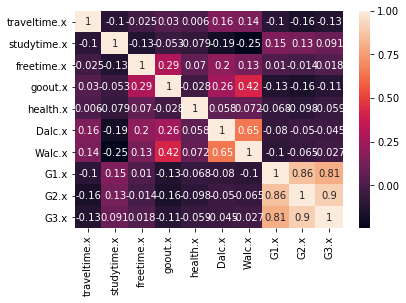

In [13]:
sns1 = fildf_x.corr()
sn.heatmap(sns1, annot=True)
plt.show()

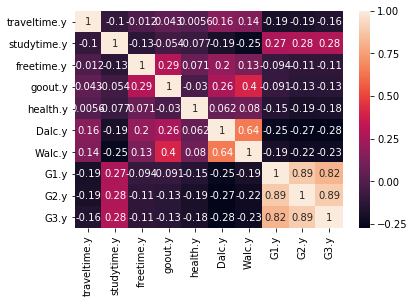

In [14]:
sns2 = fildf_y.corr()
sn.heatmap(sns2, annot=True)
plt.show()

In [15]:
#sn.pairplot(fildf_x)

In [16]:
#sn.pairplot(fildf_y)

In [17]:
fildf_x.dtypes

schoolsup.x     object
traveltime.x     int64
studytime.x      int64
paid.x          object
activities.x    object
higher.x        object
freetime.x       int64
goout.x          int64
health.x         int64
romantic.x      object
Dalc.x           int64
Walc.x           int64
G1.x             int64
G2.x             int64
G3.x             int64
dtype: object

In [18]:
label_encoder = preprocessing.LabelEncoder()

In [19]:
fildf_x['schoolsup.x']= label_encoder.fit_transform(fildf_x['schoolsup.x'])
fildf_x['paid.x']= label_encoder.fit_transform(fildf_x['paid.x'])
fildf_x['activities.x']= label_encoder.fit_transform(fildf_x['activities.x'])
fildf_x['higher.x']= label_encoder.fit_transform(fildf_x['higher.x'])
fildf_x['romantic.x']= label_encoder.fit_transform(fildf_x['romantic.x'])

In [20]:
fildf_y['schoolsup.y']= label_encoder.fit_transform(fildf_y['schoolsup.y'])
fildf_y['paid.y']= label_encoder.fit_transform(fildf_y['paid.y'])
fildf_y['activities.y']= label_encoder.fit_transform(fildf_y['activities.y'])
fildf_y['higher.y']= label_encoder.fit_transform(fildf_y['higher.y'])
fildf_y['romantic.y']= label_encoder.fit_transform(fildf_y['romantic.y'])

In [21]:
features_x_G1 = fildf_x.drop(['G1.x','G2.x','G3.x'],axis=1)
features_x_G2 = fildf_x.drop(['G2.x','G3.x'],axis=1)
features_x_G3 = fildf_x.drop(['G3.x'],axis=1)

In [22]:
features_y_G1 = fildf_y.drop(['G1.y','G2.y','G3.y'],axis=1)
features_y_G2 = fildf_y.drop(['G2.y','G3.y'],axis=1)
features_y_G3 = fildf_y.drop(['G3.y'],axis=1)

In [23]:
target_x_G1 = fildf_x['G1.x']
target_x_G2 = fildf_x['G2.x']
target_x_G3 = fildf_x['G3.x']

In [24]:
target_y_G1 = fildf_y['G1.y']
target_y_G2 = fildf_y['G2.y']
target_y_G3 = fildf_y['G3.y']

In [25]:
X_train_x_G1, X_test_x_G1, y_train_x_G1, y_test_x_G1 = train_test_split(features_x_G1, target_x_G1, test_size=0.25, random_state=42)
X_train_x_G2, X_test_x_G2, y_train_x_G2, y_test_x_G2 = train_test_split(features_x_G2, target_x_G2, test_size=0.25, random_state=42)
X_train_x_G3, X_test_x_G3, y_train_x_G3, y_test_x_G3 = train_test_split(features_x_G3, target_x_G3, test_size=0.25, random_state=42)

In [26]:
X_train_y_G1, X_test_y_G1, y_train_y_G1, y_test_y_G1 = train_test_split(features_y_G1, target_y_G1, test_size=0.25, random_state=42)
X_train_y_G2, X_test_y_G2, y_train_y_G2, y_test_y_G2 = train_test_split(features_y_G2, target_y_G2, test_size=0.25, random_state=42)
X_train_y_G3, X_test_y_G3, y_train_y_G3, y_test_y_G3 = train_test_split(features_y_G3, target_y_G3, test_size=0.25, random_state=42)

In [27]:
regr_model = DecisionTreeRegressor(max_depth=5)

R-squared = 0.04184


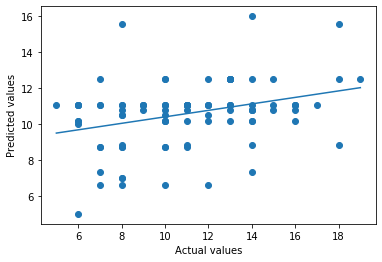

Feature freetime.x and its importance is 0.22490566071236417
Feature higher.x and its importance is 0.18750240627673728
Feature goout.x and its importance is 0.1532335445287561
Feature schoolsup.x and its importance is 0.1387559343015527
Feature health.x and its importance is 0.1378199961113353
Feature studytime.x and its importance is 0.10306456541380367
Feature paid.x and its importance is 0.028887361406493103
Feature activities.x and its importance is 0.02105716392208592
Feature Dalc.x and its importance is 0.0047733673268716866
Feature traveltime.x and its importance is 0.0
Feature romantic.x and its importance is 0.0
Feature Walc.x and its importance is 0.0


([<matplotlib.axis.XTick at 0x7f9e042ba210>,
 <a list of 12 Text xticklabel objects>)

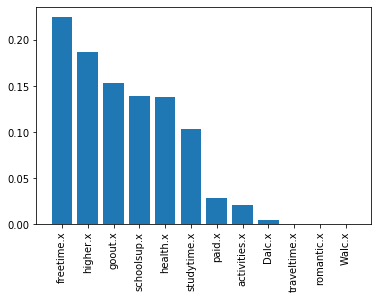

In [28]:
imp_dict={}
regr_model.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1 = regr_model.predict(X_test_x_G1)
r_squared = r2_score(y_test_x_G1,y_pred_x_G1)
plt.scatter(y_test_x_G1,y_pred_x_G1)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot(np.unique(y_test_x_G1), np.poly1d(np.polyfit(y_test_x_G1, y_pred_x_G1, 1))(np.unique(y_test_x_G1)))
print('R-squared = %0.5f' % r_squared)
plt.show()
for importance, name in sorted(zip(regr_model.feature_importances_, X_train_x_G1.columns),reverse=True):
    imp_dict[name] = importance
    print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

R-squared = 0.47537


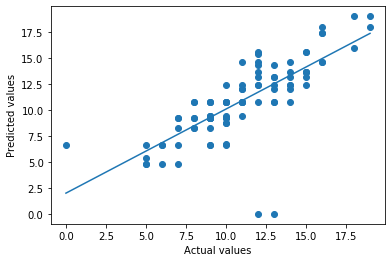

Feature G1.x and its importance is 0.8425058715667908
Feature Dalc.x and its importance is 0.058213385651992605
Feature romantic.x and its importance is 0.03084267013996709
Feature studytime.x and its importance is 0.024333985503484843
Feature traveltime.x and its importance is 0.015275425490724142
Feature Walc.x and its importance is 0.008638481565402168
Feature freetime.x and its importance is 0.008629371467305384
Feature schoolsup.x and its importance is 0.004181939199127757
Feature goout.x and its importance is 0.0027247070733234457
Feature higher.x and its importance is 0.001377588638282327
Feature paid.x and its importance is 0.0013500368655168643
Feature health.x and its importance is 0.0011250307212637258
Feature activities.x and its importance is 0.0008015061168188956


([<matplotlib.axis.XTick at 0x7f9e04003410>,
 <a list of 13 Text xticklabel objects>)

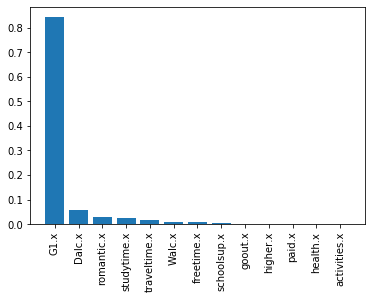

In [29]:
imp_dict={}
regr_model.fit(X_train_x_G2,y_train_x_G2)
y_pred_x_G2 = regr_model.predict(X_test_x_G2)
r_squared = r2_score(y_test_x_G2,y_pred_x_G2)
plt.scatter(y_test_x_G2,y_pred_x_G2)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot(np.unique(y_test_x_G2), np.poly1d(np.polyfit(y_test_x_G2, y_pred_x_G2, 1))(np.unique(y_test_x_G2)))
print('R-squared = %0.5f' % r_squared)
plt.show()
for importance, name in sorted(zip(regr_model.feature_importances_, X_train_x_G2.columns),reverse=True):
    imp_dict[name] = importance
    print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

R-squared = 0.82072


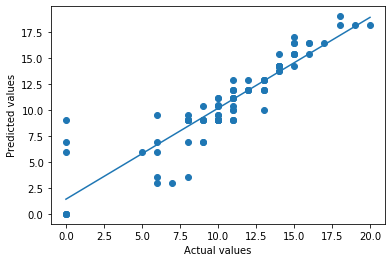

Feature G2.x and its importance is 0.9414795185490992
Feature studytime.x and its importance is 0.023628308931650657
Feature goout.x and its importance is 0.016271415046028782
Feature health.x and its importance is 0.012696945822624619
Feature G1.x and its importance is 0.0046869614777826606
Feature Walc.x and its importance is 0.0009077948273554581
Feature Dalc.x and its importance is 0.00023858997858016806
Feature paid.x and its importance is 9.046536687841397e-05
Feature traveltime.x and its importance is 0.0
Feature schoolsup.x and its importance is 0.0
Feature romantic.x and its importance is 0.0
Feature higher.x and its importance is 0.0
Feature freetime.x and its importance is 0.0
Feature activities.x and its importance is 0.0


([<matplotlib.axis.XTick at 0x7f9e0426bb50>,
 <a list of 14 Text xticklabel objects>)

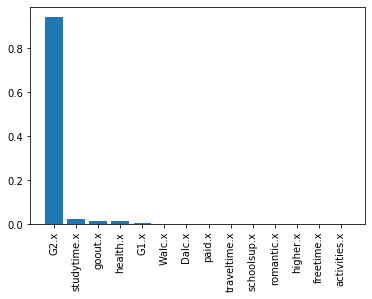

In [30]:
imp_dict={}
regr_model.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3 = regr_model.predict(X_test_x_G3)
r_squared = r2_score(y_test_x_G3,y_pred_x_G3)
plt.scatter(y_test_x_G3,y_pred_x_G3)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot(np.unique(y_test_x_G3), np.poly1d(np.polyfit(y_test_x_G3, y_pred_x_G3, 1))(np.unique(y_test_x_G3)))
print('R-squared = %0.5f' % r_squared)
plt.show()
for importance, name in sorted(zip(regr_model.feature_importances_, X_train_x_G3.columns),reverse=True):
    imp_dict[name] = importance
    print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

R-squared = 0.04803


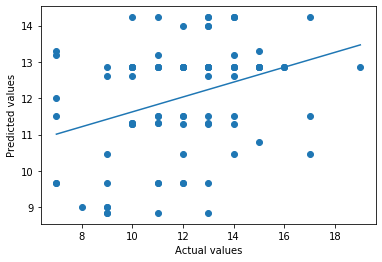

Feature higher.y and its importance is 0.23539054640367613
Feature freetime.y and its importance is 0.16916848198221024
Feature studytime.y and its importance is 0.14048776352712478
Feature Dalc.y and its importance is 0.10933170930861792
Feature schoolsup.y and its importance is 0.1045106324502243
Feature traveltime.y and its importance is 0.10201750871961181
Feature goout.y and its importance is 0.06771401168271862
Feature health.y and its importance is 0.02597546535506656
Feature Walc.y and its importance is 0.024643168806403947
Feature paid.y and its importance is 0.020760711764345772
Feature romantic.y and its importance is 0.0
Feature activities.y and its importance is 0.0


([<matplotlib.axis.XTick at 0x7f9e03fa0910>,
 <a list of 12 Text xticklabel objects>)

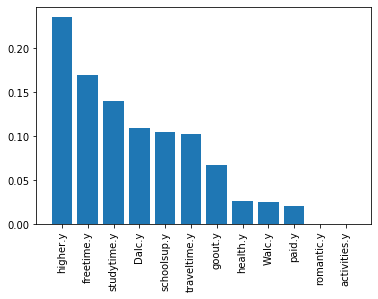

In [31]:
imp_dict={}
regr_model.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = regr_model.predict(X_test_y_G1)
r_squared = r2_score(y_test_y_G1,y_pred_y_G1)
plt.scatter(y_test_y_G1,y_pred_y_G1)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot(np.unique(y_test_y_G1), np.poly1d(np.polyfit(y_test_y_G1, y_pred_y_G1, 1))(np.unique(y_test_y_G1)))
print('R-squared = %0.5f' % r_squared)
plt.show()
for importance, name in sorted(zip(regr_model.feature_importances_, X_train_y_G1.columns),reverse=True):
    imp_dict[name] = importance
    print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

R-squared = 0.76332


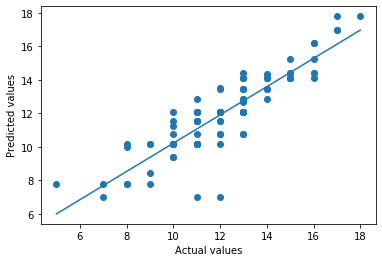

Feature G1.y and its importance is 0.9382128158094812
Feature higher.y and its importance is 0.012126547453223939
Feature goout.y and its importance is 0.011379529347424179
Feature schoolsup.y and its importance is 0.009439114046397482
Feature traveltime.y and its importance is 0.00939987297094425
Feature health.y and its importance is 0.008455679244588423
Feature Walc.y and its importance is 0.005101163438805158
Feature Dalc.y and its importance is 0.0032495295118371713
Feature romantic.y and its importance is 0.0013502200187689554
Feature freetime.y and its importance is 0.0012855281585292982
Feature studytime.y and its importance is 0.0
Feature paid.y and its importance is 0.0
Feature activities.y and its importance is 0.0


([<matplotlib.axis.XTick at 0x7f9e03e5e710>,
 <a list of 13 Text xticklabel objects>)

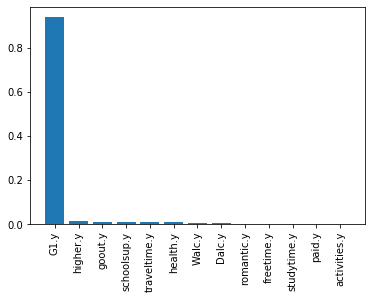

In [32]:
imp_dict={}
regr_model.fit(X_train_y_G2,y_train_y_G2)
y_pred_y_G2 = regr_model.predict(X_test_y_G2)
r_squared = r2_score(y_test_y_G2,y_pred_y_G2)
plt.scatter(y_test_y_G2,y_pred_y_G2)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot(np.unique(y_test_y_G2), np.poly1d(np.polyfit(y_test_y_G2, y_pred_y_G2, 1))(np.unique(y_test_y_G2)))
print('R-squared = %0.5f' % r_squared)
plt.show()
for importance, name in sorted(zip(regr_model.feature_importances_, X_train_y_G2.columns),reverse=True):
        imp_dict[name] = importance
        print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)


R-squared = 0.65238


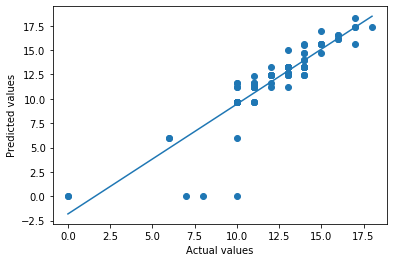

Feature G2.y and its importance is 0.8728803662097894
Feature G1.y and its importance is 0.07220999174640899
Feature goout.y and its importance is 0.02777518140757361
Feature traveltime.y and its importance is 0.009618498491593132
Feature health.y and its importance is 0.004493101572496753
Feature activities.y and its importance is 0.004360233489815352
Feature romantic.y and its importance is 0.0022245844518908207
Feature freetime.y and its importance is 0.0017135063909111876
Feature schoolsup.y and its importance is 0.0016638304595171197
Feature Dalc.y and its importance is 0.001477049717225749
Feature Walc.y and its importance is 0.0012081572013321188
Feature studytime.y and its importance is 0.00037549886144578736
Feature paid.y and its importance is 0.0
Feature higher.y and its importance is 0.0


([<matplotlib.axis.XTick at 0x7f9e0476f890>,
 <a list of 14 Text xticklabel objects>)

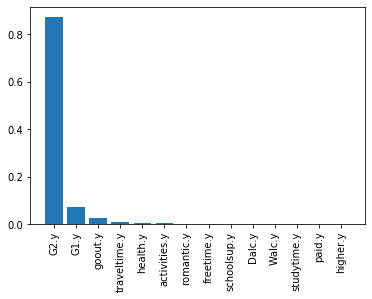

In [33]:
imp_dict={}
regr_model.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = regr_model.predict(X_test_y_G3)
r_squared = r2_score(y_test_y_G3,y_pred_y_G3)
plt.scatter(y_test_y_G3,y_pred_y_G3)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot(np.unique(y_test_y_G3), np.poly1d(np.polyfit(y_test_y_G3, y_pred_y_G3, 1))(np.unique(y_test_y_G3)))
print('R-squared = %0.5f' % r_squared)
plt.show()
for importance, name in sorted(zip(regr_model.feature_importances_, X_train_y_G3.columns),reverse=True):
    imp_dict[name] = importance
    print ('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)